## Histogramas e Intensidade

# Histogramas e Tranformações de Intensidade

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Função responsavel por imprimir duas imagens lado a lado

In [4]:
def plot_image(img1, img2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(img1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2,cmap="gray")
    plt.title(title_2)
    plt.show()

Função responsavel por plotar dois histogramas lado a lado

In [5]:
def plot_hist(imagem_antiga, imagem_nova,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([imagem_antiga],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([imagem_nova],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

### Histogramas

Um histograma conta o número de ocorrências dos valores de intensidade de pixels e é uma ferramenta útil para entender e manipular imagens.

Usa-se a funcao cv.calHist() para gerar os histogramas.

Para este exemplo, toma-se valores de 0 a 2, sendo 0 - preto e 2 - branco. 
Para uma matriz [[0,0,2],[1,1,1],[2,1,0]], vemos que:

A intensidade 0 aparece 3 vezes.

A intensidade 1 aparece 4 vezes.

A intensidade 2 aparece 2 vezes.

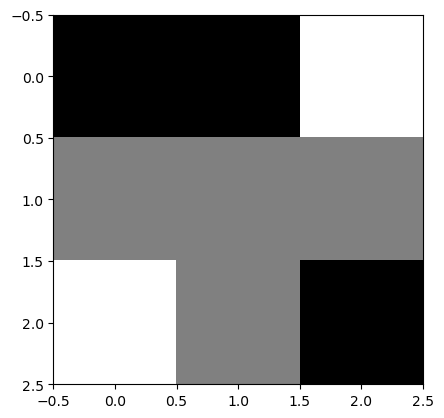

toy_image: [[0 0 2]
 [1 1 1]
 [2 1 0]]


In [6]:
toy_image = np.array([[0,0,2],[1,1,1],[2,1,0]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

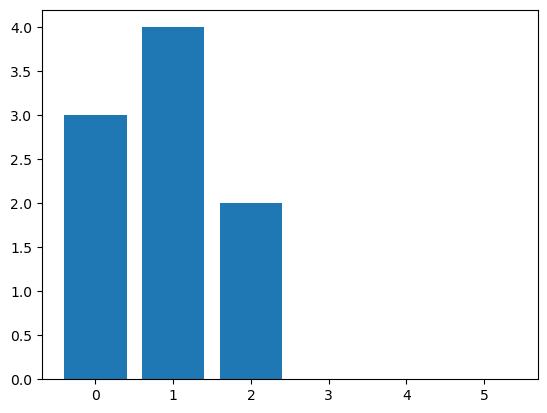

In [7]:
#plotando o histograma para essas intensidade
#h = [2, 5, 2]
plt.bar([x for x in range(6)],[3,4,2,0,0,0])
plt.show()

O histograma desse vetor segue a função h[r], para   $r \in {0,1,2} $. Resultando em $h[0] = 3$, $h[1] = 4$, $h[2] = 2$.

### Histogramas para a escala cinza

Imagens coloridas são divididas em luminância e crominância. A luminância é a porção em tons de cinza e geralmente é processada em muitas aplicações.

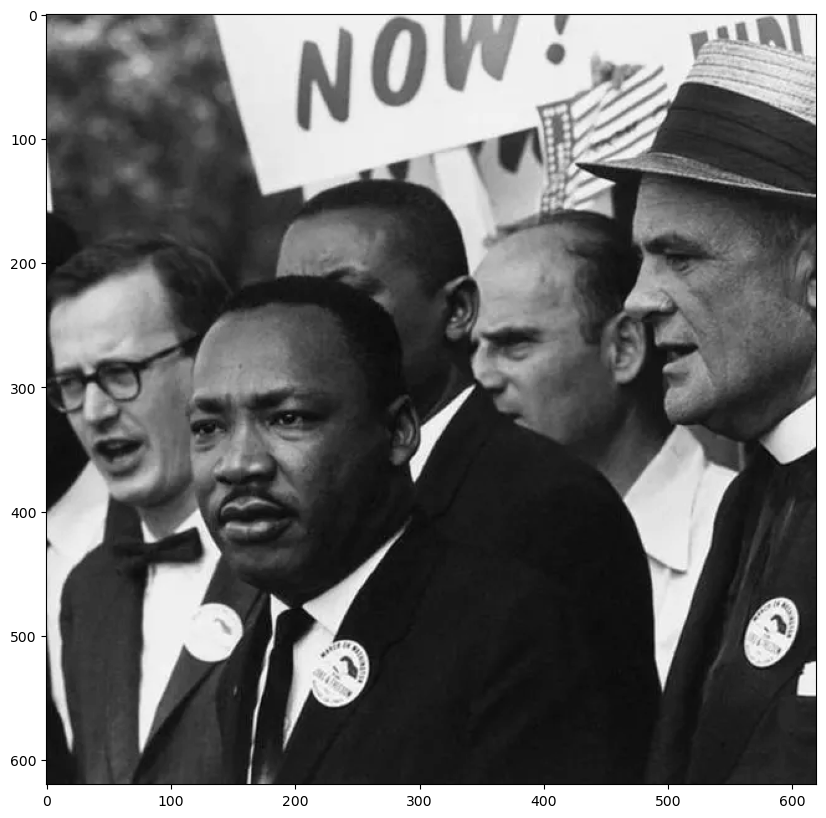

In [8]:
martin = cv2.imread("./img/martin.bmp", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(martin,cmap="gray")
plt.show()

### Parâmetros da função `cv2.calcHist()`

1. **`images`**:  
   Lista de arrays (imagem ou imagens de entrada).  
   Exemplo: `[img]`.

2. **`channels`**:  
   Lista de inteiros indicando os canais a serem processados.  
   Exemplo: `[0]` para tons de cinza ou `[0, 1, 2]` para RGB.

3. **`mask`**:  
   Array (máscara binária) ou `None`.  
   Define a região da imagem para calcular o histograma.  
   Exemplo: `None` ou uma máscara binária.

4. **`histSize`**:  
   Lista de inteiros representando o número de bins (faixas).  
   Exemplo: `[256]` para 256 bins.

5. **`ranges`**:  
   Lista de floats representando o intervalo de intensidade.  
   Exemplo: `[0, 256]` para intensidades de 0 a 255.

6. **`accumulate`**:  
   Booleano para definir se o histograma será acumulado.  
   - `True`: Acumula com valores existentes.  
   - `False` (padrão): Sobrescreve os valores.



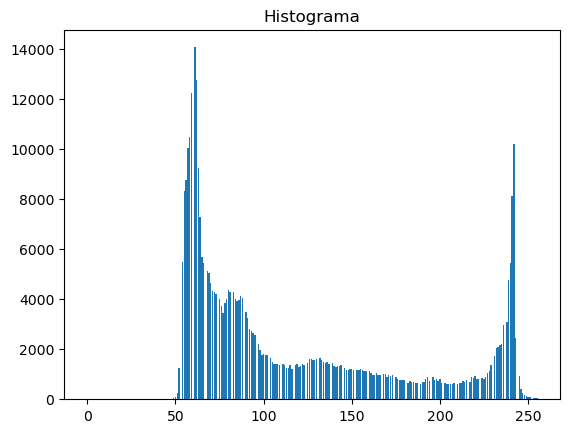

In [9]:
hist_martin = cv2.calcHist([martin], [0], None, [256], [0,256])
valores_intesi = np.array([x for x in range(hist_martin.shape[0])])

plt.bar(valores_intesi, hist_martin[:,0], width = 0.8)
plt.title("Histograma")
plt.show()


Valores proximos de 0-100 indicam que a imagem é escura e vlorem entre 200-255 indicam que a imagem é clara. 

Probabilidade: o processo de normalização transforma uma contagem de frequências de valores de pixels em probabilidades

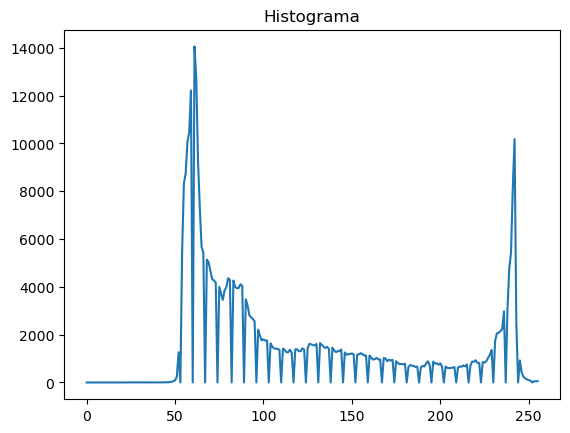

In [10]:
#função de massa de probabilidade
PMF = hist_martin / (martin.shape[0] * martin.shape[1])

plt.plot(valores_intesi, hist_martin)
plt.title("Histograma")
plt.show()


Aplicando em imagens coloridas

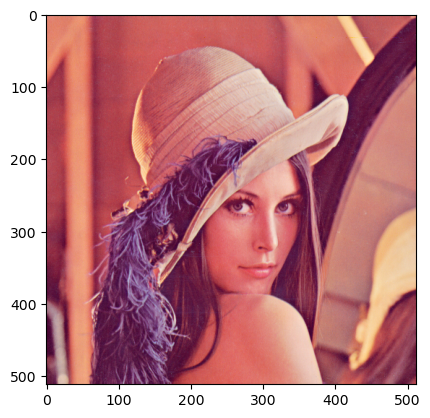

In [11]:
lenna = cv2.imread("./img/lenna.png")
plt.imshow(cv2.cvtColor(lenna,cv2.COLOR_BGR2RGB))
plt.show()

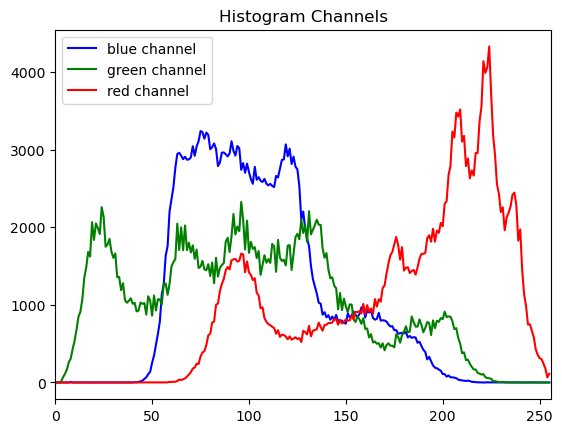

In [12]:
color = ('blue','green','red')

#esse loop percorre os tres canais da imagem e calcula seu respectivo histograma
for i,col in enumerate(color):
    histr = cv2.calcHist([lenna],[i],None,[256],[0,256])
    plt.plot(valores_intesi,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])#limitando o eixo x
plt.legend()
plt.title("Histogram Channels")
plt.show()

### Tranformações de Intensidade

A transformação aplicada a uma função T sobre os valores da imagem podem gerar uma nova imagem g(x,y):
$$
g(x,y)=T(f(x,y))
$$
Essas tranformações dependem somente da intensidade do pixel em (x,y), não levando em conta a vizinhança;

Essa operação, também é chamada de Mapeamento de niveis de cinza, pois mapeia um valor de intensidade de entrada r para uma valor de saída s:
$$
s = T(r)
$$

#### Imagens Negativas
A criação de imagens negativas é um exemplo de transformação de intensidade. 
 Ex: Dado um intervalo de intensidades [0,L-1] e usando a seguinte fórmula:
 $$
 g(x,y) = L - 1 - f(x,y)
 $$
 Sendo L o numero total de intensidades, f(x,y) a intensidade original e g(x,y) a nova intensidade.

In [13]:
neg_image = - 1 * toy_image + 255

print("Imagem Original \n", toy_image)
print("Imagem Negativa\n", neg_image)

Imagem Original 
 [[0 0 2]
 [1 1 1]
 [2 1 0]]
Imagem Negativa
 [[255 255 253]
 [254 254 254]
 [253 254 255]]


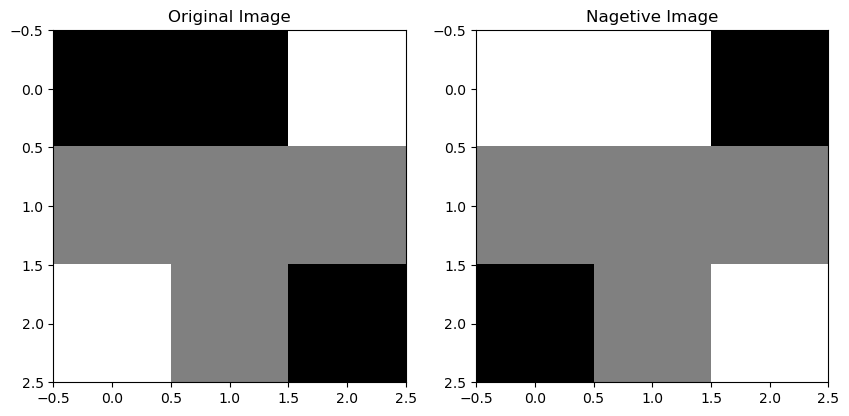

toy_image: [[0 0 2]
 [1 1 1]
 [2 1 0]]


In [14]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(neg_image,cmap="gray")
plt.title("Nagetive Image")
plt.show()
print("toy_image:",toy_image)

#### Aplicacao 

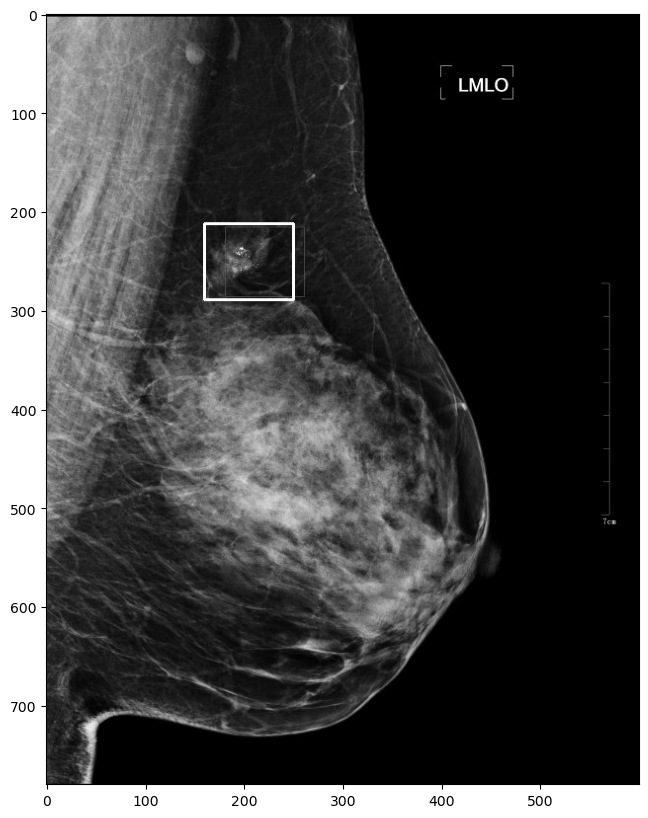

In [15]:
image = cv2.imread("./img/mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.show()

aplicando a transformação 

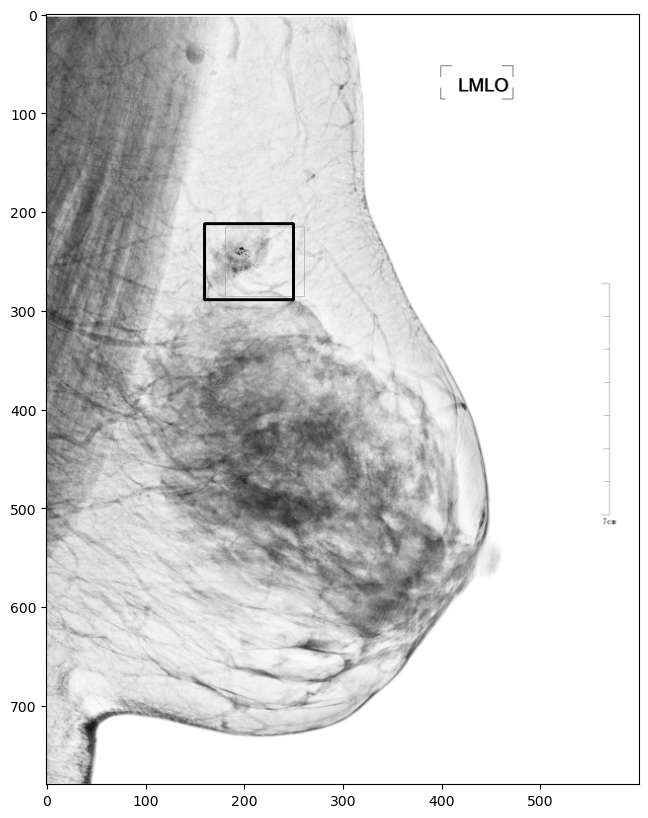

In [16]:
neg_image = -1 * image + 255

plt.figure(figsize=(10,10))
plt.imshow(neg_image, cmap="gray")
plt.show()

### Brilho e Ajuste de Constraste

A imagem original f(x,y) e a nova imagem g(x,y), onde g(x,y) segue a equação:
$$
g(x,y) = \alpha f(x,y) + \beta$$

Sendo $\alpha$  e $\beta$ , respectivamente as variaveis de  controle de contraste e brilho.
Para isso usa-se a função <code>convertScaleAbs<code>.

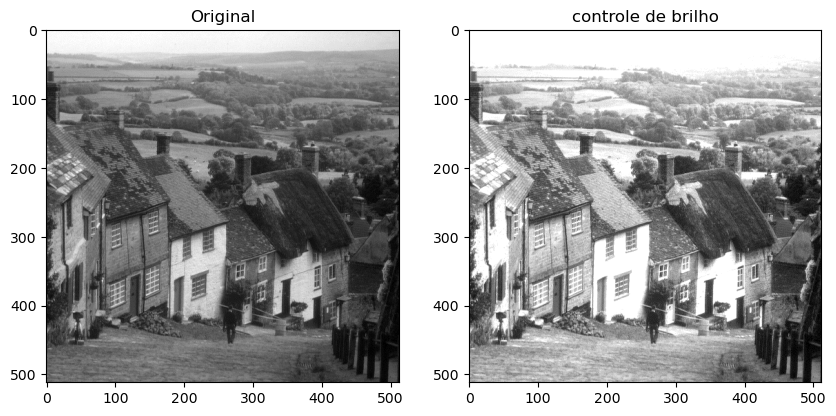

In [17]:
alpha = 1
beta = 100
image =  cv2.imread("./img/goldhill.bmp",cv2.IMREAD_GRAYSCALE)
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

plot_image(image, new_image, title_1="Original", title_2="controle de brilho")

observando o histograma

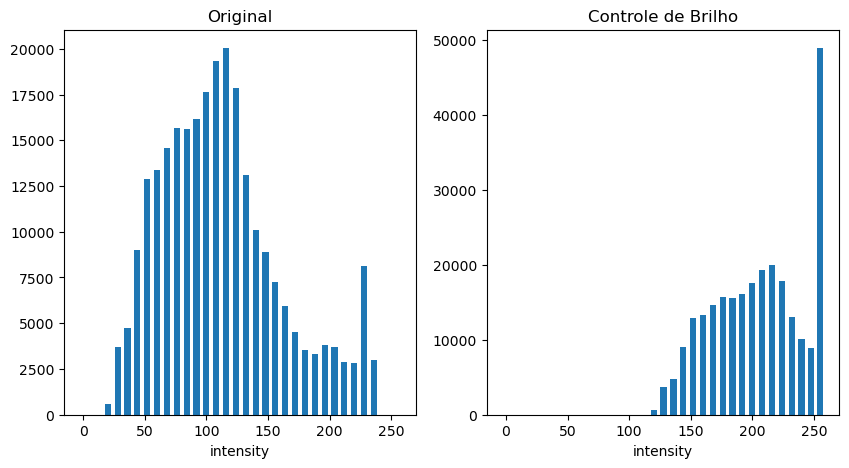

In [18]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Original", "Controle de Brilho")

é possível notar pelos histrogramas, que após a tranformação temos uma maior luminosidade na nova imagem.

Aplicando contraste na imagem, $g(x,y) =  2*f(x,y) + 0$.

<Figure size 1000x500 with 0 Axes>

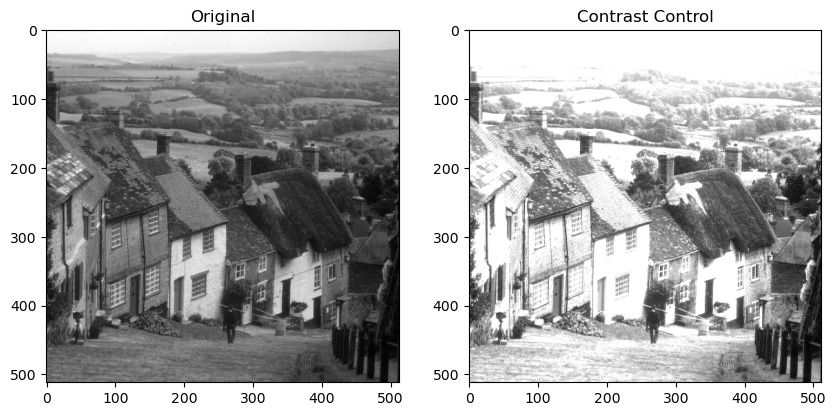

In [19]:
alpha = 2
beta = 0
plt.figure(figsize=(10,5))
new_image = cv2.convertScaleAbs(image, new_image, alpha=alpha, beta=beta)

plot_image(image, new_image, "Original", "Contrast Control")

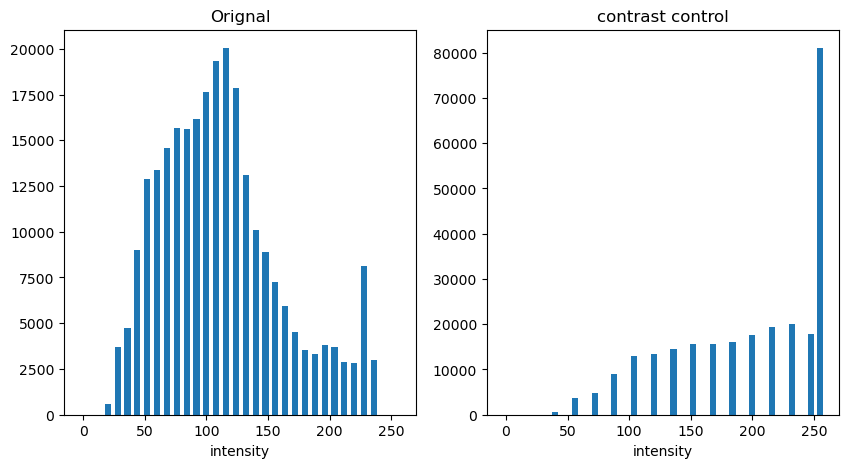

In [20]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image,"Orignal","contrast control")

Ao plotar a imagem, vemos que ela está muito brilhante. Podemos adaptar o brilho tornando a imagem mais escura e aumentando o contraste ao mesmo tempo.

<Figure size 1000x500 with 0 Axes>

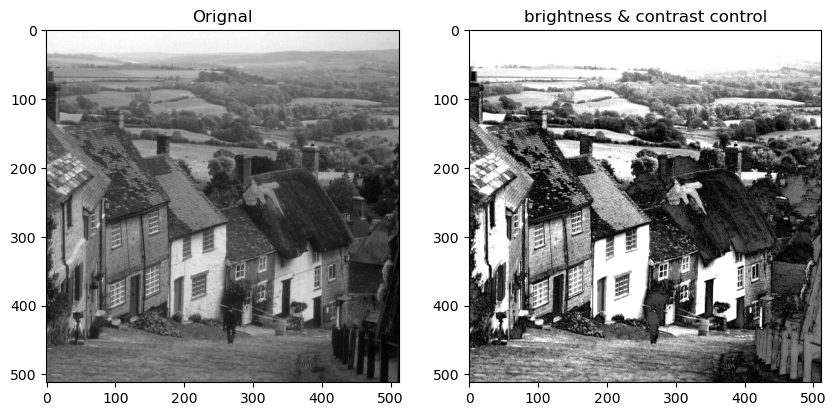

In [21]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

plot_image(image, new_image, "Orignal", "brightness & contrast control")

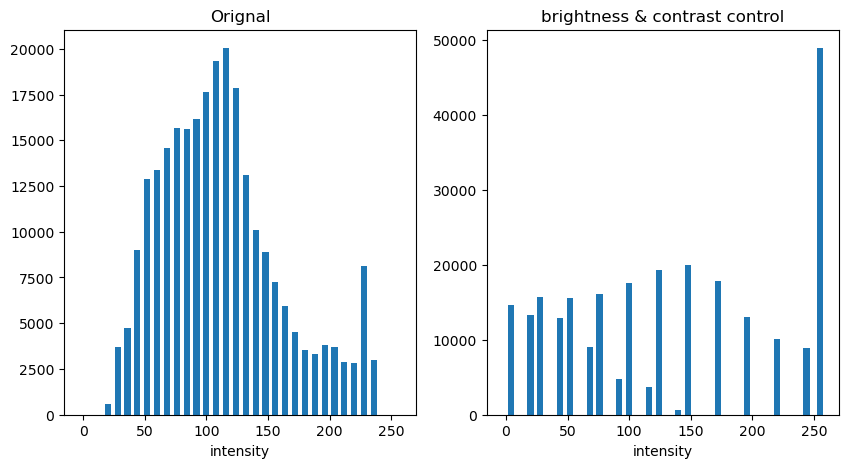

In [22]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "brightness & contrast control")

### Histogram Equalization

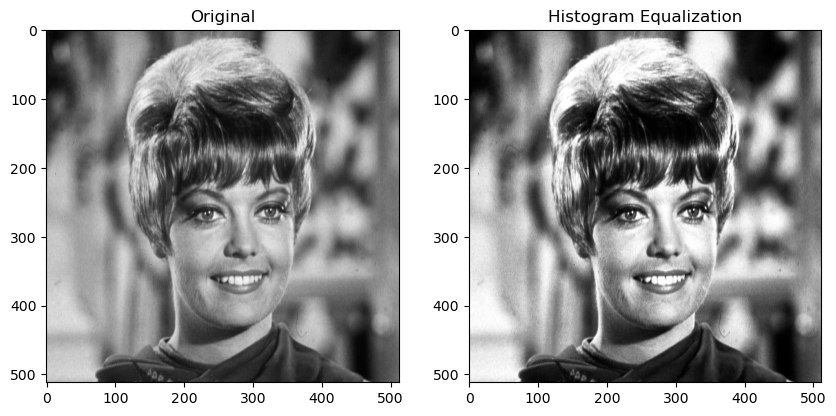

In [23]:
zelda = cv2.imread("./img/zelda.png", cv2.IMREAD_GRAYSCALE)
#equalizando os valores de forma automatica com o openvCV
new_zelda = cv2.equalizeHist(zelda)

plot_image(zelda, new_zelda, "Original", "Histogram Equalization")

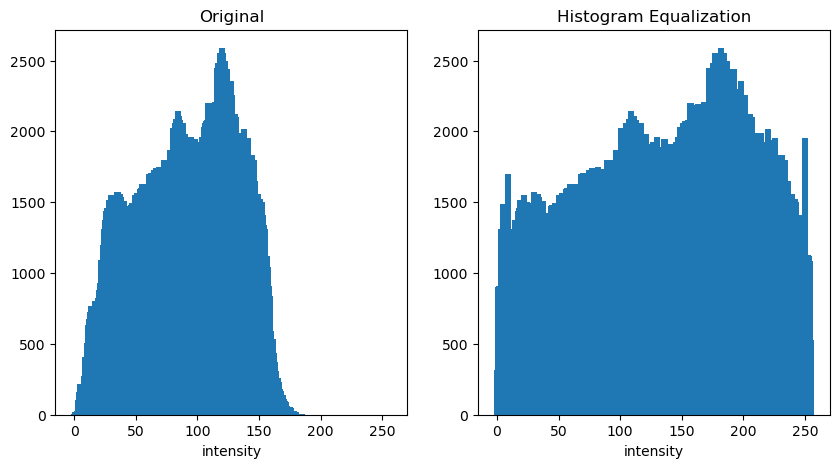

In [24]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_zelda,"Original", "Histogram Equalization")

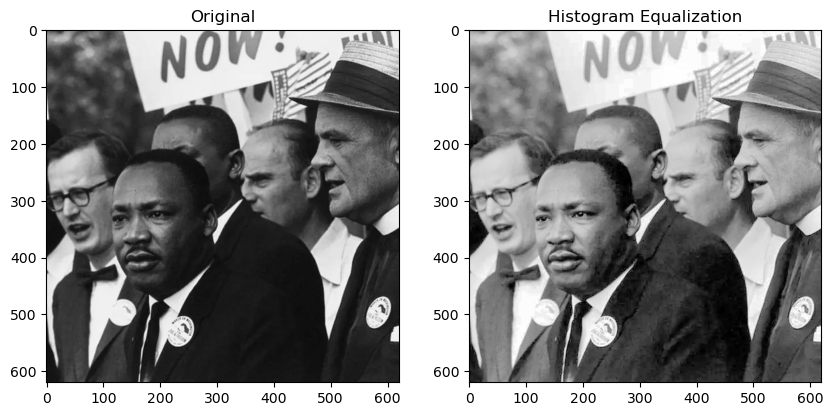

In [25]:
martin = cv2.imread("./img/martin.bmp", cv2.IMREAD_GRAYSCALE)
#equalizando os valores de forma automatica com o openvCV
new_martin = cv2.equalizeHist(martin)

plot_image(martin, new_martin, "Original", "Histogram Equalization")

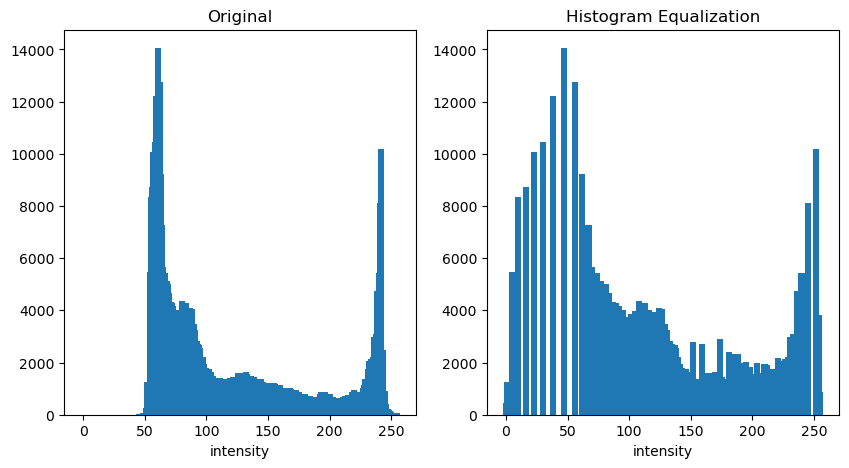

In [26]:
plt.figure(figsize=(10,5))
plot_hist(martin, new_martin, "Original", "Histogram Equalization")

### Thresholding e Segmentação simples

consiste em separar objetos de interesse do fundo de uma imagem.

Como o Thresholding Funciona?
Definição do Threshold (limiar):

Escolhe-se um valor de limiar 
𝑇
T.
Cada pixel da imagem é comparado a esse valor 
𝑇
T.
Processo de Classificação:

Se o valor de intensidade do pixel 
𝑓
(
𝑖
,
𝑗
)
f(i,j) for maior ou igual a 
𝑇
T, o pixel recebe um valor de saída, normalmente 1 ou 255 (branco).
Caso contrário, o pixel recebe o valor 0 (preto).
Saída:

O resultado é uma imagem binária (preto e branco), onde os objetos de interesse são separados do fundo.

In [31]:
#função responsavel por aplicar o Thresholding na imagem
def thresholding(input_image, threshold, max_value=255, min_value=0):
    N,M = input_image.shape
    image_out = np.zeros((N,M), dtype=np.uint8)

    for i  in range(N):
        for j in range(M):
            if input_image[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    
    return image_out

In [34]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)

print("Original\n", toy_image)
print("thresholding\n",thresholding_toy) ##é possivl notar que a trsnformação permite somente os extremos 0 e 2

Original
 [[0 0 2]
 [1 1 1]
 [2 1 0]]
thresholding
 [[0 0 2]
 [0 0 0]
 [2 0 0]]


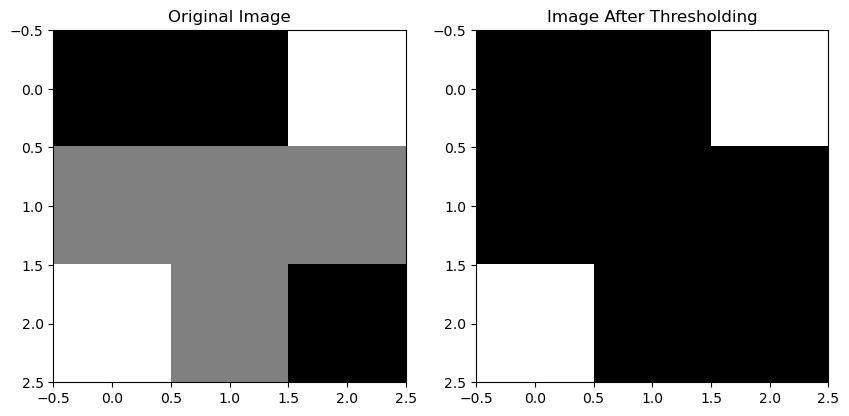

In [35]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

aplicação numa imagem real:

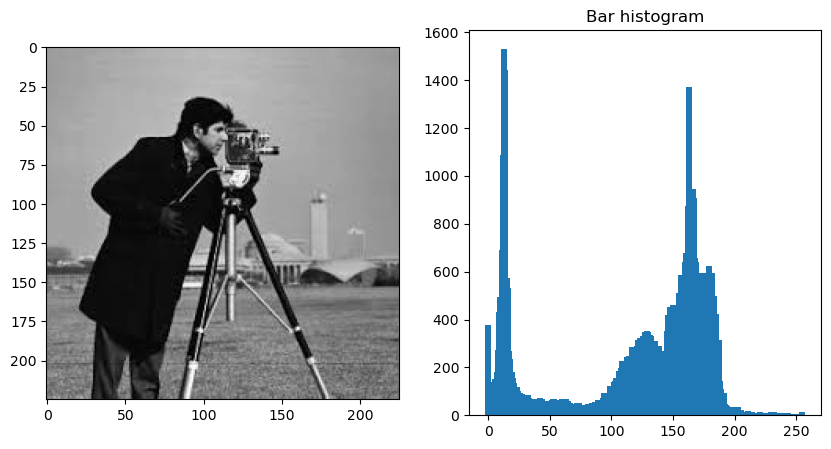

In [47]:
img_camera = cv2.imread("./img/cameraman.jpeg", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([img_camera], [0], None, [256], [0, 256])
intensity_values = np.array([x for x in range(hist.shape[0])])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_camera, cmap="gray")
plt.subplot(1,2,2)
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

Como o fotografo é composto por pixels mais escuros, vamos usar a tecnica de Thresholding para deixar somente ele na imagem


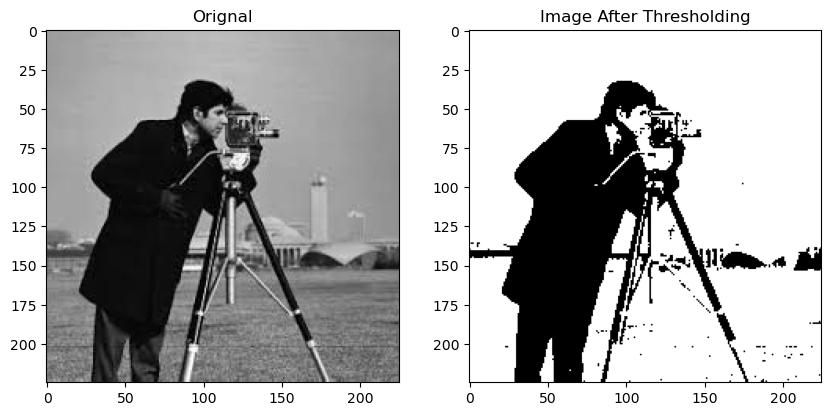

In [59]:
threshold = 85
max_value = 255
min_value = 0
new_image = thresholding(img_camera, threshold=threshold, max_value= max_value, min_value=min_value)

plot_image(img_camera, new_image, "Orignal", "Image After Thresholding")

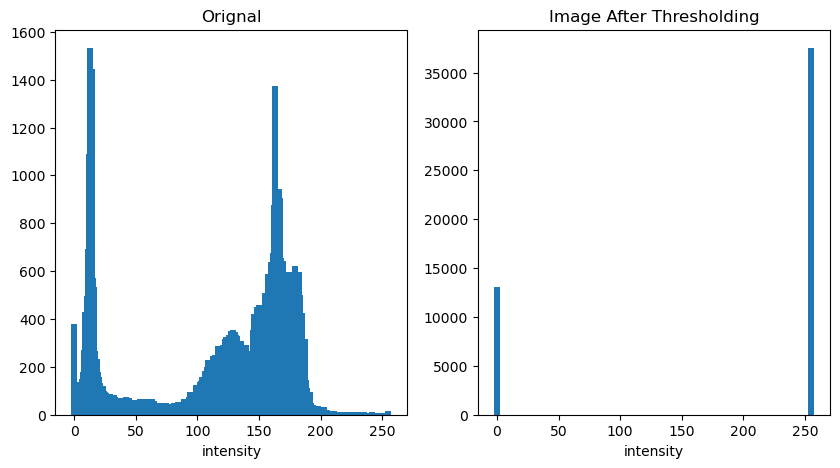

In [60]:
plt.figure(figsize=(10,5))
plot_hist(img_camera, new_image, "Orignal", "Image After Thresholding")

Outra Possibilidade: a função cv2.threshold() da biblioteca OPENCV que possui os parametros:

<code>cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type )</code>

O tipo de Thresholding de parâmetro é o tipo de limiar que gostaríamos de executar. Por exemplo, temos limiar básico: <code>cv2.THRESH_BINARY</code> este é o tipo que implementamos na função <code>thresholding</code>, é apenas um número:

In [61]:
cv2.THRESH_BINARY

0

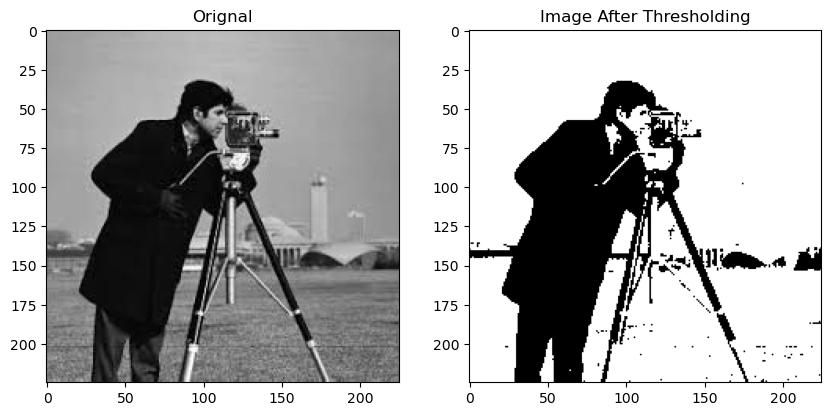

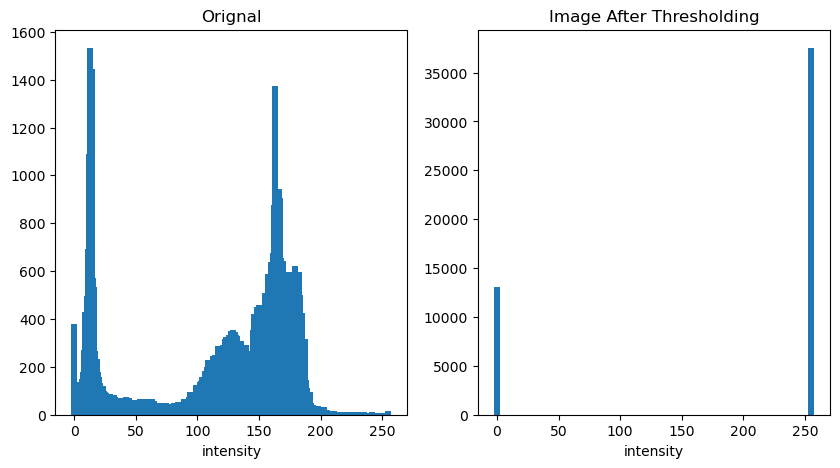

In [63]:
ret, new_image = cv2.threshold(img_camera,threshold,max_value,cv2.THRESH_BINARY)
plot_image(img_camera,new_image,"Orignal","Image After Thresholding")
plt.figure(figsize=(10,5))
plot_hist(img_camera, new_image,"Orignal","Image After Thresholding")

<code>ret</code> é o valor limite e <code>new_image</code> é a imagem após o limite ter sido aplicado. Existem diferentes tipos de limite, por exemplo, cv2.THRESH_TRUNC não alterará os valores se os pixels forem menores que o valor limite:

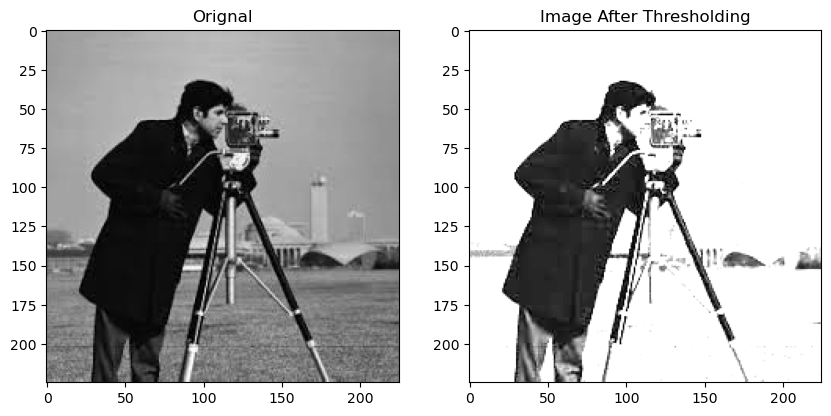

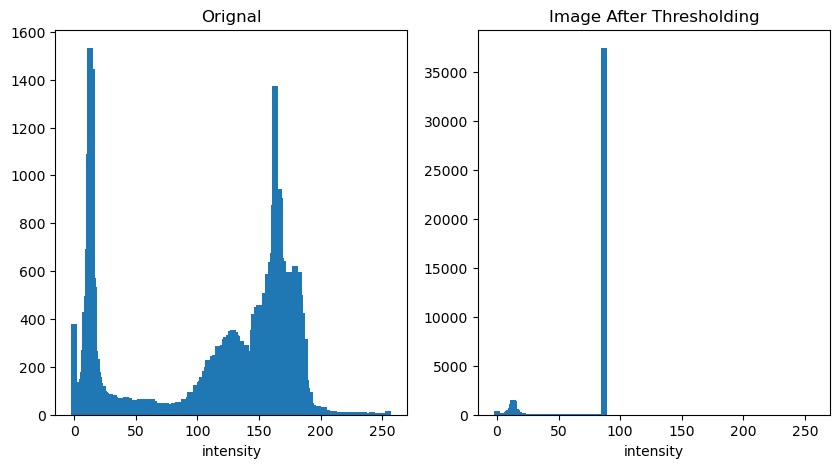

In [66]:
ret, new_image = cv2.threshold(img_camera,87,255,cv2.THRESH_TRUNC)
plot_image(img_camera,new_image,"Orignal","Image After Thresholding")
plt.figure(figsize=(10,5))
plot_hist(img_camera, new_image,"Orignal","Image After Thresholding")

Metodo Otsu:

cv2.THERSH_OTSU evita ter que escolher um valor e o determina automaticamente, usando o histograma.

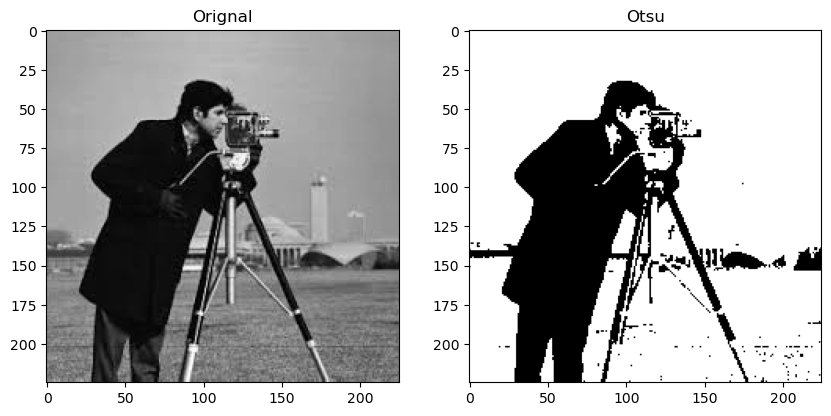

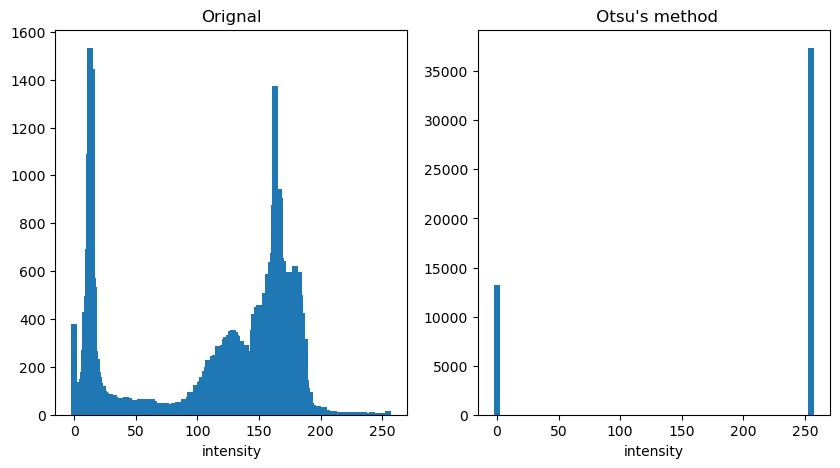

In [70]:
ret, otsu = cv2.threshold(img_camera,0,255,cv2.THRESH_OTSU)
plot_image(img_camera,otsu,"Orignal","Otsu")
plt.figure(figsize=(10,5))
plot_hist(img_camera, otsu,"Orignal"," Otsu's method")

In [71]:
ret

88.0

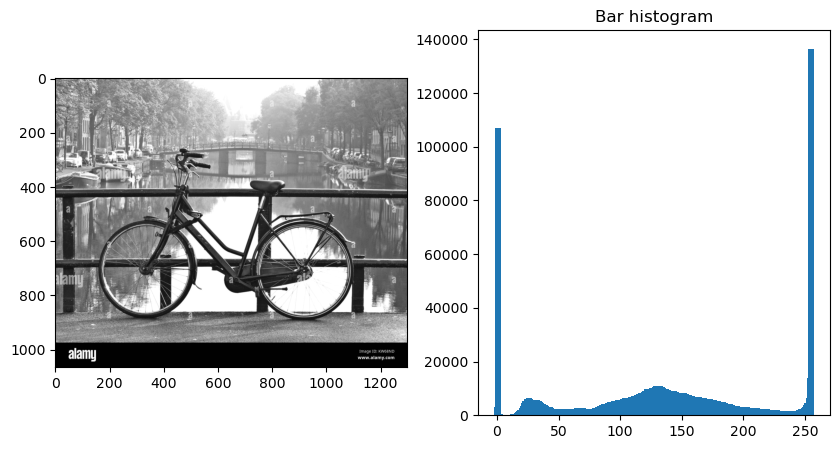

In [ ]:
aux_img = cv2.imread("./img/chaplin.png", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([aux_img], [0], None, [256], [0, 256])
intensity_values = np.array([x for x in range(hist.shape[0])])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(aux_img, cmap="gray")
plt.subplot(1,2,2)
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

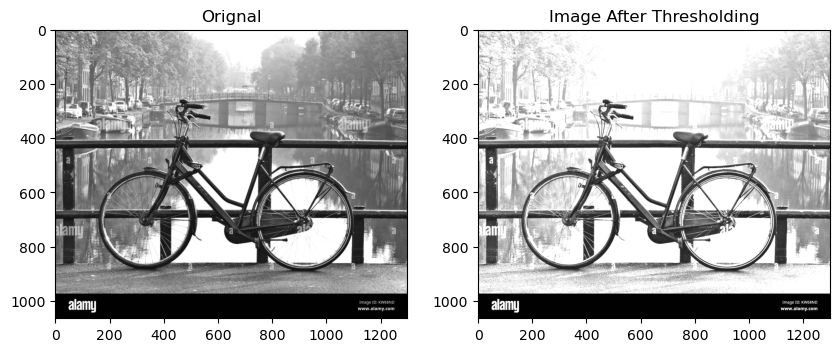

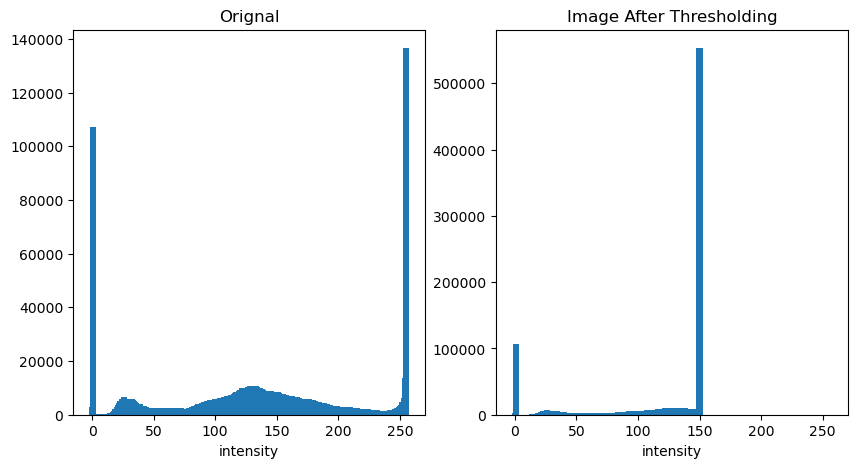

In [ ]:
ret, new_image = cv2.threshold(aux_img,150,255,cv2.THRESH_TRUNC)
plot_image(aux_img,new_image,"Orignal","Image After Thresholding")
plt.figure(figsize=(10,5))
plot_hist(aux_img, new_image,"Orignal","Image After Thresholding")

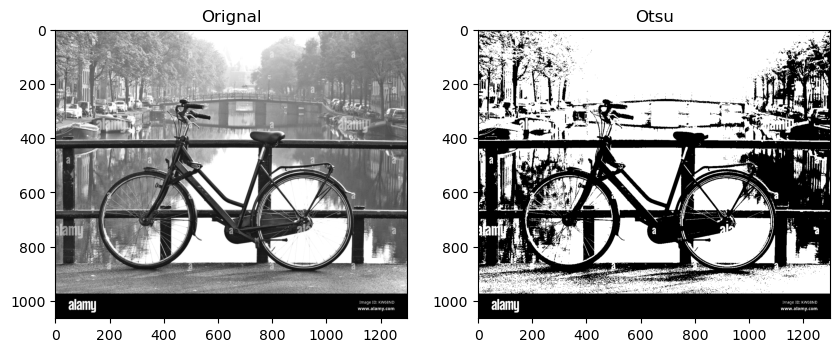

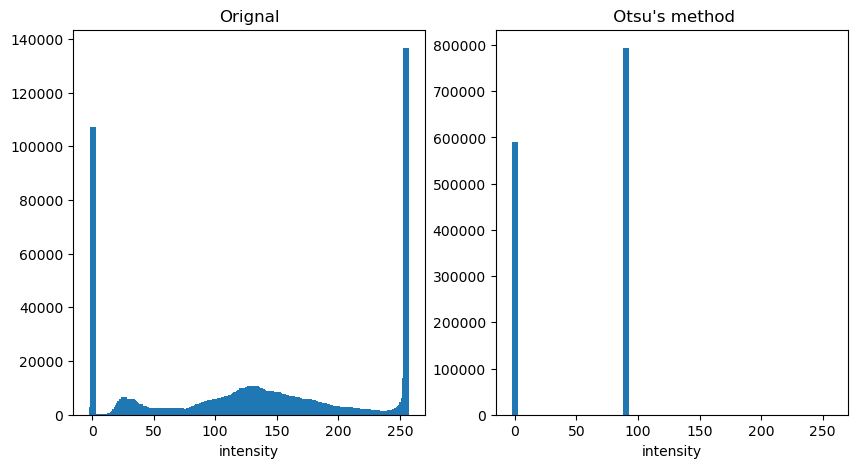

124.0

In [89]:
ret, otsu = cv2.threshold(aux_img,0,90,cv2.THRESH_OTSU)
plot_image(aux_img, otsu,"Orignal","Otsu") 
plt.figure(figsize=(10,5))
plot_hist(aux_img, otsu,"Orignal"," Otsu's method")

ret